In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datasets import load_dataset
import math

# number of images of each digit for training
num_images = 100

In [3]:
# loading the dataset
dataset = load_dataset("mnist")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [4]:
training_data = dataset['train']
labelled_data = [[] for i in range(10)]
for data_point in training_data:
    image = data_point['image']
    label = data_point['label']
    labelled_data[label].append(np.array(image).flatten())

# separated data as per their labels
labelled_data = np.array([labelled_data[i][:num_images] for i in range(10)], dtype='float64')
labelled_data = labelled_data.reshape(-1, labelled_data.shape[-1]).T
print(labelled_data.shape)

(784, 1000)


In [5]:
def kernelise(labelled_data, d):
    '''The kernelise function kernelises the array sent to it'''
    kernelised_data = np.zeros((10*num_images, 10*num_images))
    for i in range(10*num_images):
        for j in range(10*num_images):
            diff = labelled_data[:, i] - labelled_data[:, j]
            kernelised_data[i, j] = np.exp((-(np.dot(diff, diff))/(2*(d**2))))
    return kernelised_data

def center_kernel(k_d):
    '''The center_kernel function center the kernelised data'''
    one_n = np.ones((10*num_images, 10*num_images))/(10*num_images)
    centered_kernelised_data = np.array(k_d - np.dot(one_n, k_d) - np.dot(k_d, one_n) + np.dot(np.dot(one_n, k_d), one_n))
    epsilon = 1e-8
    centered_kernelised_data += epsilon*np.eye(10*num_images)
    return centered_kernelised_data

# n is the number of different values of sigma
n = 3
sigmas = np.linspace(1000, 3000, n)
kernelised_data = np.array([kernelise(labelled_data, sigma) for sigma in sigmas])
centered_kernelised_data = np.array([center_kernel(kd) for kd in kernelised_data])

In [6]:
eigen_vectors, eigen_values = [], []
for ckd in centered_kernelised_data:
    eigen_vals, eigen_vecs = np.linalg.eig(ckd)
    descending_indices = np.argsort(eigen_vals)[::-1]
    eigen_vals = eigen_vals[descending_indices]
    eigen_vecs = eigen_vecs[:, descending_indices].real
    eigen_values.append(eigen_vals)
    eigen_vectors.append(eigen_vecs)
eigen_values = np.array(eigen_values)
eigen_vectors = np.array(eigen_vectors)
print(eigen_vecs.shape)

(1000, 1000)


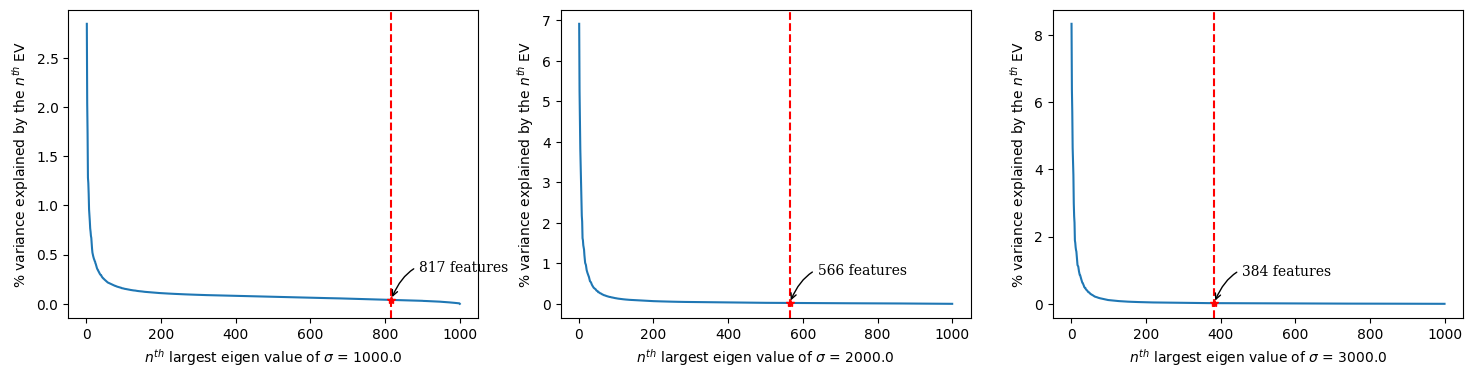

In [7]:
eigen_sums = np.zeros(n)
for i, eigen_vals in enumerate(eigen_values):
    eigen_sums[i] = np.sum(eigen_vals)

percentage_var_explained = np.array([(eigen_value/eigen_sums[i])*100 for i, eigen_value in enumerate(eigen_values)])
max_explained = np.zeros(3, dtype='int')

for i in range(3):
    count = 0
    temp = 0
    while temp < 95:
        temp += percentage_var_explained[i, count]
        count += 1
    max_explained[i] = count

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, axis in enumerate(axes):
    axis.plot(np.linspace(1, 1000, 1000), percentage_var_explained[i])
    axis.axvline(x=max_explained[i], color='red', linestyle='--')
    axis.plot(max_explained[i], percentage_var_explained[i, max_explained[i]], 'r*')
    axis.annotate(str(max_explained[i] + 1) + " features", fontsize=10, family="serif",
        xy=(max_explained[i], percentage_var_explained[i, max_explained[i]]), xycoords="data", 
        xytext=(+20, +20), textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))
    axis.set_xlabel(r"$n^{th}$ largest eigen value of $\sigma$ = " + str(sigmas[i]))
    axis.set_ylabel(r"% variance explained by the $n^{th}$ EV")

plt.savefig('images/Q1/ker_var_exp_rad')
plt.show()

In [8]:
alphas = np.array([[eigen_vectors[i, :, j]/math.sqrt(max(1, eigen_values[i, j])) for j in range(10*num_images)] for i in range(n)])

In [9]:
projections = np.array([np.matmul(alphas[i], ckd.T)for i, ckd in enumerate(centered_kernelised_data)])
print(projections.shape)

(3, 1000, 1000)


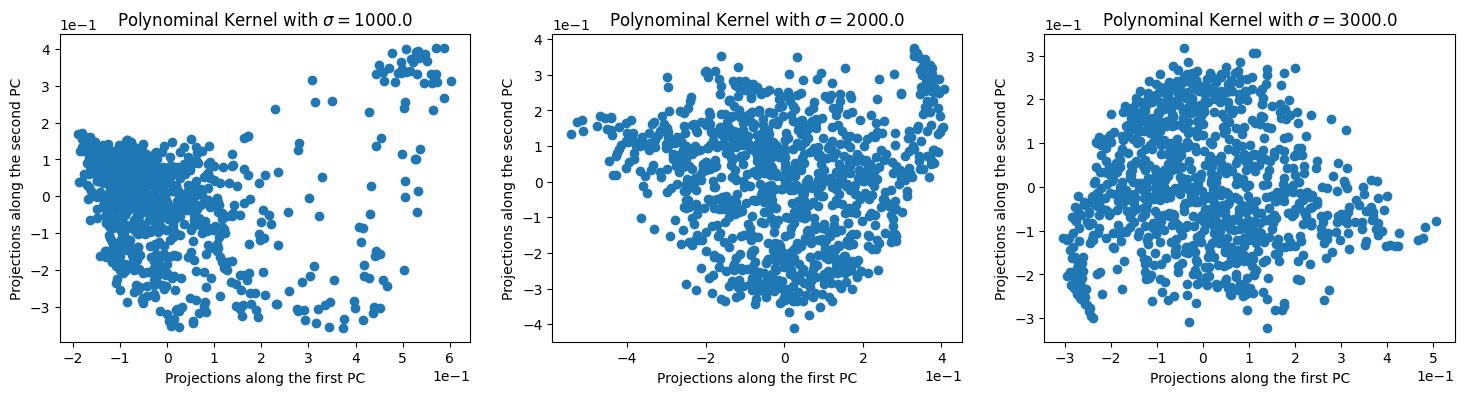

In [10]:

fig, axes = plt.subplots(n//3, 3, figsize = (18, 4))
for j, axis in enumerate(axes):
    
    axis.scatter(projections[j, 0], projections[j, 1])
    axis.ticklabel_format(scilimits=(0, 4))
    axis.set_xlabel("Projections along the first PC")
    axis.set_ylabel("Projections along the second PC")
    axis.set_title(r"Polynominal Kernel with $\sigma = $" + str(sigmas[j]))

plt.savefig('images/Q1/w1vsw2rad')
plt.show()

In [16]:
sigma = np.linspace(1000, 10000, 10)
temp_kernelised_data = np.array([kernelise(labelled_data, sig) for sig in sigma])
centered_temp_data = np.array([center_kernel(tkd) for tkd in temp_kernelised_data])

In [17]:
eigen_vectors, eigen_values = [], []
for ckd in centered_temp_data:
    eigen_vals, eigen_vecs = np.linalg.eig(ckd)
    descending_indices = np.argsort(eigen_vals)[::-1]
    eigen_vals = eigen_vals[descending_indices]
    eigen_vecs = eigen_vecs[:, descending_indices].real
    eigen_values.append(eigen_vals)
    eigen_vectors.append(eigen_vecs)
eigen_values = np.array(eigen_values)
eigen_vectors = np.array(eigen_vectors)
print(eigen_vecs.shape)

(1000, 1000)


In [18]:
eigen_sums = np.zeros(10)
for i, eigen_vals in enumerate(eigen_values):
    eigen_sums[i] = np.sum(eigen_vals)

percentage_var_explained = np.array([(eigen_value/eigen_sums[i])*100 for i, eigen_value in enumerate(eigen_values)])
max_explained = np.zeros(10, dtype='int')

for i in range(10):
    count = 0
    temp = 0
    while temp < 95:
        temp += percentage_var_explained[i, count]
        count += 1
    max_explained[i] = count

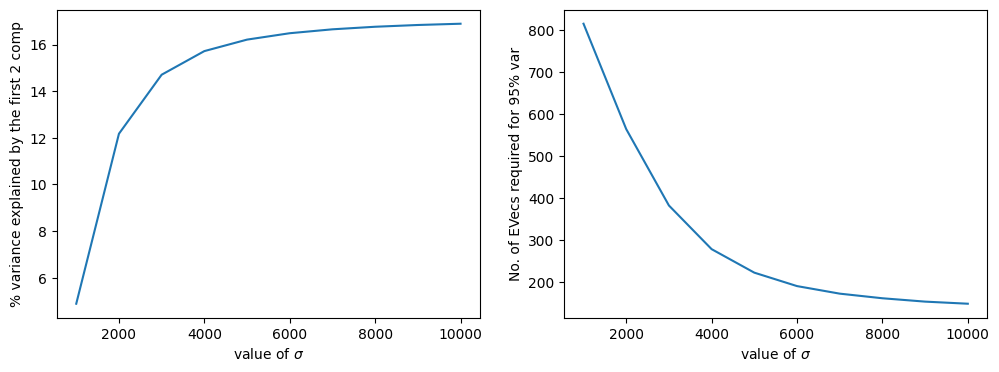

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].plot(np.linspace(1000, 10000, 10), np.array([np.sum(temp[:2]) for temp in percentage_var_explained]))
axes[0].set_xlabel(r"value of $\sigma$")
axes[0].set_ylabel("% variance explained by the first 2 comp")
axes[1].plot(np.linspace(1000, 10000, 10), max_explained)
axes[1].set_xlabel(r"value of $\sigma$")
axes[1].set_ylabel("No. of EVecs required for 95% var")
plt.savefig('images/Q1/p4exp')
plt.show()